In [1]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

import skimage
import skimage.external.tifffile

import os

(297, 23)
0
149


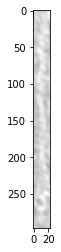

In [2]:
#zoom call timestamp 19:00 
width = 23;
height = 69;
every = 5;

#import mask
input_image_path = os.path.abspath(os.path.join('/Users/johannesschoeneberg/Desktop/SchoenebergLab_Cal/collaboration_daniel_Serwas/PositiveControl/FilamentProjections/TomoJune_Fil06_Projection_crop.tif'))
output_folder_path = os.path.abspath(os.path.join('/Users/johannesschoeneberg/Desktop/SchoenebergLab_Cal/collaboration_daniel_Serwas/PositiveControl/FilamentProjections/output/'))




image = skimage.external.tifffile.imread(input_image_path)
print(image.shape)
plt.imshow(image,cmap='gray')

print(np.min(image))
globalMin = np.min(image)
print(np.max(image))
globalMax = np.max(image) 

In [6]:



import time
start_time = time.time()



totalHeight = image.shape[0]
print(totalHeight);
nSubpictures = (np.floor(((totalHeight-height)/every))).astype(int)
subpictures = []
for i in range(0,nSubpictures):
    print(i)
    subpicture = image[i*every:height+i*every,:]
    
    skimage.external.tifffile.imsave(output_folder_path+"/output_"+str(i).zfill(5)+".tiff", subpicture, imagej=True );
    
#    plt.imshow(subpicture,cmap='gray')
#    plt.show()
    subpictures.append(subpicture)
    
    
print("--- %s seconds ---" % (time.time() - start_time))


297
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
--- 0.09614181518554688 seconds ---


In [7]:
print(len(subpictures))

45


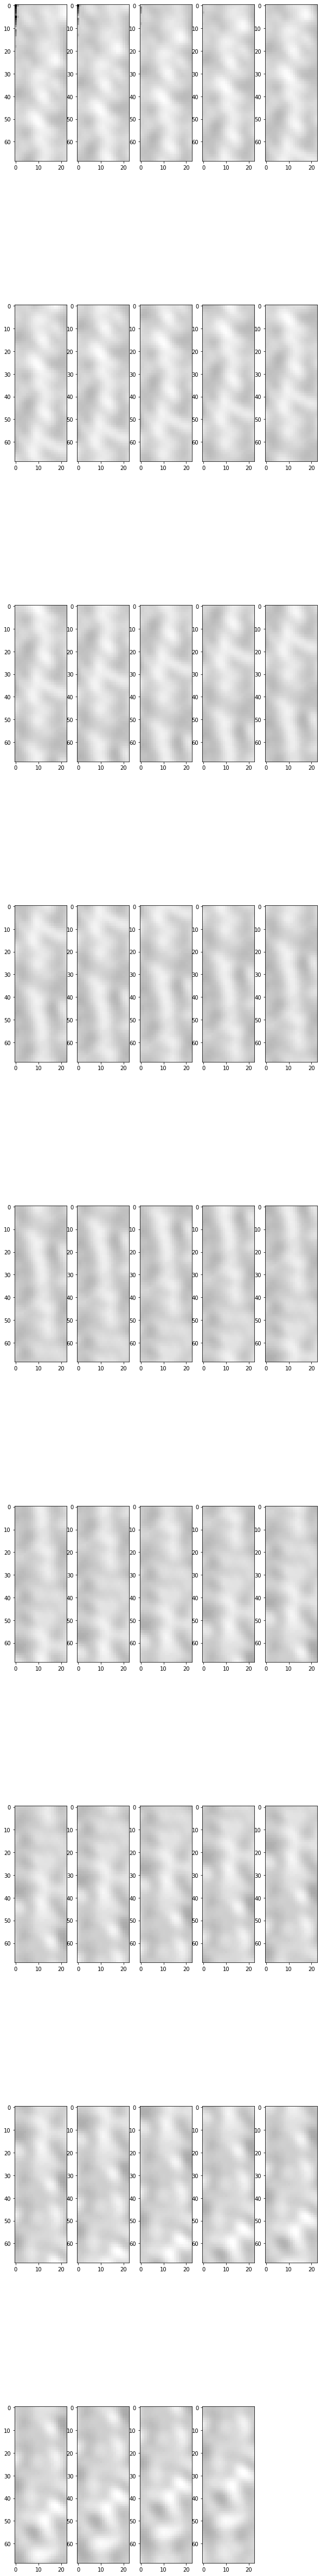

In [11]:

w=10
h=90
fig=plt.figure(figsize=(w, h))
columns = 5
rows = 9
for i in range(1, columns*rows ):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(subpictures[i],vmin=globalMin, vmax=globalMax,cmap='gray')
plt.show()

In [12]:
# Correlation Coefficient

(297, 23)


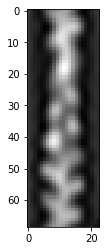

(297, 23)


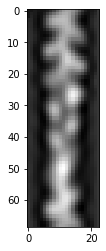

In [13]:
# read the references
MinusUp_image_path = os.path.abspath(os.path.join('/Users/johannesschoeneberg/Desktop/SchoenebergLab_Cal/collaboration_daniel_Serwas/ReferenceImageStacks/MinusUp.tif'))
PlusUp_image_path = os.path.abspath(os.path.join('/Users/johannesschoeneberg/Desktop/SchoenebergLab_Cal/collaboration_daniel_Serwas/ReferenceImageStacks/PlusUp.tif'))

minusUpReference = skimage.external.tifffile.imread(MinusUp_image_path)
print(image.shape)
plt.imshow(minusUpReference[0],cmap='gray')
plt.show()

plusUpReference = skimage.external.tifffile.imread(PlusUp_image_path)
print(image.shape)
plt.imshow(plusUpReference[0],cmap='gray')
plt.show()

In [32]:
# calculate correlation coefficient:
# from https://www.gcsca.net/IJ/Image_CorrelationJ_1o.java

#float getStd(float mValue,float[] dataset){
#		float sValue=0;
#		if (dataset.length==1) {return (float) (sValue);}
#		else{
#			for (int j=0; j<dataset.length; j++){sValue += sqr(mValue-dataset[j]);}
#			return (float) (Math.sqrt(sValue/(dataset.length-1)));
#		}
#	}


# float getR(float[] d1, float[] d2){
#		float t1=0, t2=0, sum=0;
#		float xMean=getMean(d1);
#		float yMean=getMean(d2);
#		float xStd=getStd(xMean, d1);
#		float yStd=getStd(yMean, d2);
#		for (int i=0; i<d1.length;i++){
#			t1=(d1[i]-xMean)/xStd;
#			t2=(d2[i]-yMean)/yStd;
#			sum=sum+(t1*t2);
#		}
#		float r= sum/(d1.length-1);
#		return (r);
#	}


#
#


def getR(d1, d2):
    d1 = np.array(d1).flatten()
    d2 = np.array(d2).flatten()
    t1 = 0
    t2 = 0
    sumValue = 0
    xMean = np.mean(d1)
    yMean = np.mean(d2)
    xStd = np.std(d1)
    yStd = np.std(d2)

    for i in range(0,len(d1)):
        t1 = (d1[i]-xMean)/xStd
        t2 = (d2[i]-yMean)/yStd
        sumValue = sumValue + (t1*t2)
    r = sumValue/(len(d1)-1)
    return(r)

In [50]:
import time
start_time = time.time()

rValuesPlusUpReference = []
rValuesMinusUpReference = []

for i in range(0,len(subpictures)):
    for j in range(0,len(plusUpReference)):
        rpu = getR(plusUpReference[j],subpictures[i])
        rValuesPlusUpReference.append(rpu)
    for k in range(0,len(minusUpReference)):
        rmu = getR(minusUpReference[k],subpictures[i])
        rValuesMinusUpReference.append(rmu)

print("--- %s seconds ---" % (time.time() - start_time))

--- 24.18070387840271 seconds ---


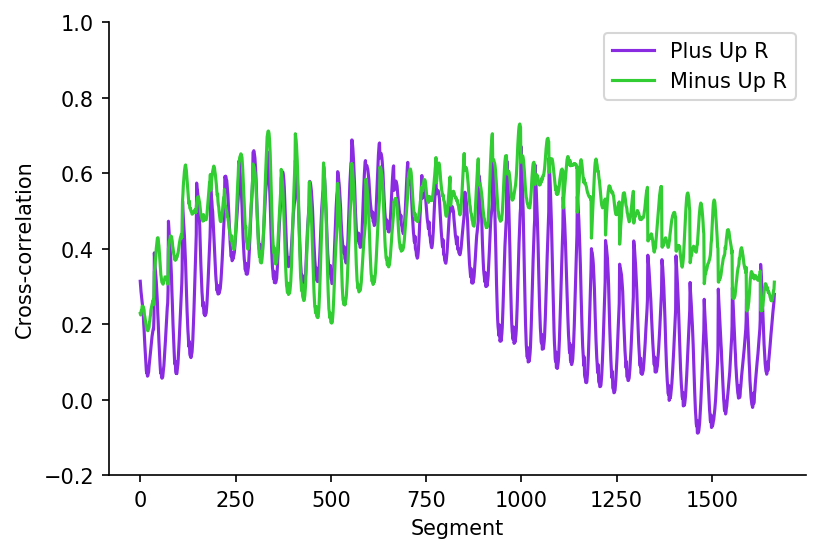

In [49]:
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html

plt.figure(dpi=150)
plt.plot(rValuesPlusUpReference,c="blueviolet",label="Plus Up R")
plt.plot(rValuesMinusUpReference,c="limegreen",label="Minus Up R")
plt.xlabel("Segment")
plt.ylabel("Cross-correlation")
# Hide the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc="upper right")
plt.ylim(-0.2,1)
plt.show()